# The Buy Now & Pay Later (BNPL) project
## Introduction 
Buy Now, Pay Later (BNPL) is a firm offering a new “Pay in 5 Installments” feature. Merchants (also known as retailers) are looking to boost their customer base by forming a partnership with this firm and in return, the BNPL firm gets a small percentage of revenue (take rate) to cover operating cost.
This industry project aims to generate a robust ranking system with insights to assist this BNPL firm in finding which merchants they should accept, we also separate the merchants into four segments with business areas and ranked the top-10 merchants in the business area.

This notebook intend to summarising the overall approach taken and the limitations/assumptions we made.




## Approach
### Data
#### we use different data from reliable resources

- ABS census data (by POS AND STATE)
- merchant transaction data
- industry turnover data

### Preprocessing
#### we use different preprocess method to build the ranking model
- Data cleaning

- Null value evaluation

- external ABS data merge to transaction data *

- Data normalization

- Outlier detection and removal ** 

- fraud data evaluation

<b>*</b>we first merge to ABS data with transaction post code, for the leftover postcode which not cover by the ABS data, we will merge those with the corresponding state ABS data.
<br><b>**</b>we exclude the merchant that meet these two conditions: 1. has revenue less then 50,000 2. transaction number less then 10  


## Fraud Data
we handle the the fraud data by the following procedure
- Mark all possible fraud transactions in dataframe
- Calculate fraud rate for each merchant
- Derive the valid transaction of each merchant by fraud rate

### Ranking Algorithm 

Our approach to the rank system is to esitmate the merchant expected revenue after join the BNPL and the merchants are ranked by expected revenue:

**expected revenue = expected_transaction_count * 1.077 * ap rate * avg_transaction_amount * takerate/100**.

where 

**ap_rate** is the percentage of customers who are likely to use afterpay for their orders, which is calculated from customer gender, rent and income, caculated by:

- **ap_rate** = consumer spare money * 0.1 + ap percentage by gender


- consumer spare money = income - rent (scale on normal distribution and inverse it, mean = 0, inverse since it's belived that the nigher the spare money, the less likely a person will use BNPL service)
  

**expected_transaction_count** is the expected count of transactions of this merchant after cooparated with BNPL company. The which we caculated by:

- annual transaction * (1+ industry turnover rate/100)

**avg_transaction_amount** is the average amount of existing transactions for this merchant;

**takerate** is the provided rate of total transaction amount that is the revenue of BNPL company.


### Result & Findings

Based on our ranking system, it is found that Top 100 merchants could produce \\$2.2 million revenue for BNPL firm, and Top 10 merchants in 4 business segments could produce \\$1.17 million revenue.


Merchants in Household and recreation segment produce a larger porportion of revenue for the BNPL firm, while merchants in fashion and electronic segment in top 10 merchants of 4 business segment produce only 41.9% of revenue for BNPL firm, while accounting for 50% of the merchants selected (20/40). 


BNPL firm should focus more on merchants in 
1. Household 
2. Recreation 

As these two segment have a higher chance of producing more revenue for BNPL firm. 

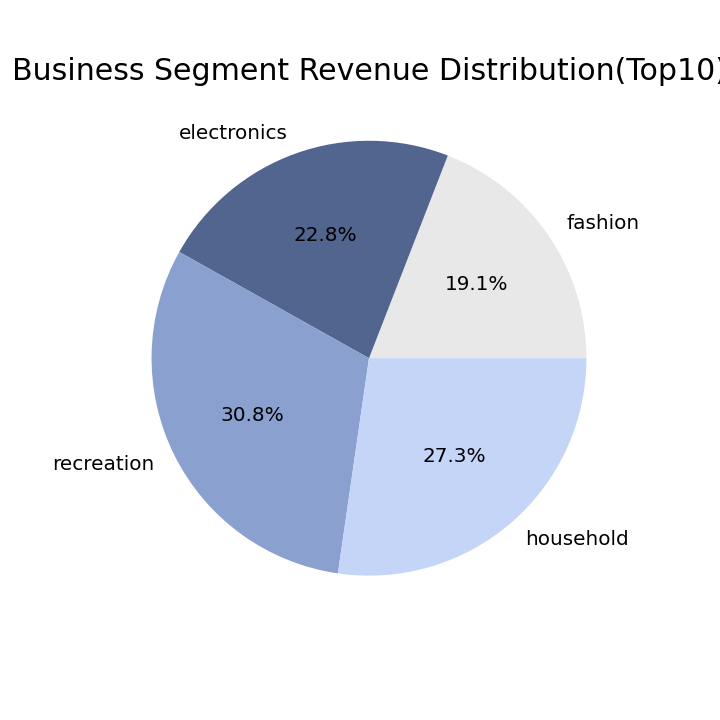

It is also found that most merchants are with revenue level of "a" & "b". This is due to the low take rate per transaction for the higher revenue band merchants ("e" & "d"). 

Highest take rate for highest revenue level "e" is 0.48%, while lowest take rate for lowest revenue level "a" is 5.5%. Even though higher revenue band merchants might have higher total transaction value, the take rate for each transaction is so low that lower revenue band merchants could beat this BNPL revenue with much lower transaction cost. That's why high revenue level merchants are not favoured in this ranking. However, by taking lower revenue merchants, BNPL firm may face higher risk

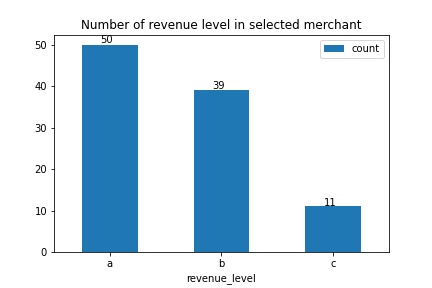

In [1]:
import pandas as pd

### Top 100 merchants

In [7]:
top100 = pd.read_parquet("../data/curated/selected/top_100_selected/")
top100.index = top100.index + 1

# remove display limit, show full dataframe
with pd.option_context('display.max_colwidth', None, 'display.max_rows', None): 
    display(top100)


,name,merchant_abn
1,Orci In Consequat Corporation,32361057556
2,Lacus Consulting,45629217853
3,Ornare Limited,96680767841
4,Mauris Non Institute,21439773999
5,Est Nunc Consulting,89726005175
6,Lobortis Ultrices Company,64403598239
7,Dignissim Maecenas Foundation,48534649627
8,Magna Malesuada Corp.,67978471888
9,Etiam Bibendum Industries,38700038932
10,Leo In Consulting,86578477987


## Top 10 recreation merchants

In [3]:
top10_re = pd.read_parquet("../data/curated/selected/selected_recreation_merchant/")
top10_re.index = top10_re.index + 1
top10_re

,name,merchant_abn
1,Orci In Consequat Corporation,32361057556
2,Lacus Consulting,45629217853
3,Lobortis Ultrices Company,64403598239
4,Magna Malesuada Corp.,67978471888
5,Dictum Phasellus In Institute,94493496784
6,Elit Sed Consequat Associates,40515428545
7,Odio Phasellus Institute,63123845164
8,Phasellus At Company,79417999332
9,Nullam Consulting,72472909171
10,Tellus Aenean Corporation,27326652377


## Top 10 electronic merchants

In [4]:
top10_elec = pd.read_parquet("../data/curated/selected/selected_electronic_merchant/")
top10_elec.index = top10_elec.index + 1
top10_elec

,name,merchant_abn
1,Orci In Consequat Corporation,32361057556
2,Lacus Consulting,45629217853
3,Lobortis Ultrices Company,64403598239
4,Magna Malesuada Corp.,67978471888
5,Dictum Phasellus In Institute,94493496784
6,Elit Sed Consequat Associates,40515428545
7,Odio Phasellus Institute,63123845164
8,Phasellus At Company,79417999332
9,Nullam Consulting,72472909171
10,Tellus Aenean Corporation,27326652377


## Top 10 household merchants

In [5]:
top10_house = pd.read_parquet("../data/curated/selected/selected_household_merchant/")
top10_house.index = top10_house.index + 1
top10_house

,name,merchant_abn
1,Ornare Limited,96680767841
2,Est Nunc Consulting,89726005175
3,Etiam Bibendum Industries,38700038932
4,Ac Ipsum LLC,80551528183
5,Phasellus At Limited,76767266140
6,Luctus Et Incorporated,49549583265
7,Amet Risus Inc.,79827781481
8,Non Vestibulum Industries,49891706470
9,Lorem Ipsum Sodales Industries,43186523025
10,Diam Eu Dolor LLC,90568944804


## Top 10 fashion merchants

In [6]:
top10_fashion = pd.read_parquet("../data/curated/selected/selected_fashion_merchant/")
top10_fashion.index = top10_fashion.index + 1
top10_fashion

,name,merchant_abn
1,Dignissim Maecenas Foundation,48534649627
2,Leo In Consulting,86578477987
3,Gravida Mauris Incorporated,49322182190
4,Commodo Ipsum Industries,19492220327
5,Blandit At LLC,11439466003
6,Dolor Quisque Inc.,93558142492
7,At Pede Inc.,95574756848
8,Sociosqu Corp.,99976658299
9,Suspendisse Dui Corporation,46804135891
10,Nulla Facilisis Institute,81761494572


### Problems

#### problem 1
problem : POS frome the ABS data is different to AU post code, there are unallocated post codes in the ABS data 

solution : using the data from ABS state level to filling the missing value

assumption: the suburb information has similar distribution to the state information



#### problem 2
problem : no information from the merchant for the actual customers data

solution : using CENSUS data (merge with the post code in the transaction data)

assumption: the customers has similar information to state average(not a outlier)


#### problem 3
problem : the negative spare money  while caculating spare moeny = income - rent, result in negative expected revenue

solution : using small number 0.0001 to substitute the negative number 

assumption: substitute does not effect the final result significantly(we treat negative spare moeny as no spare money)




## limitations/assumptions

- Uncertainties In Real Life : E.g. COVID benefits some bussiness areas and affects some bussiness areas
- Spare Money Assumption : we assume people will less money are more likely to use the BNPL service
- People with Unlimited Credit & “Good” Credit Assumption : we assume all people will pay the credit on time
- bussiness area assumption: we maunally seperate the bussiness area into different segments by our prior knowledge to the industry

## Improvement
- More Detailed Consumer Information: E.g. age information, if we have the age information from the customers we can adding more attributes to the model (give each merchant it's ap rate based on spare money and age distribution)


- BNPL Internal Business Area Report: E.g. if we have the information from BNPL such as increase in transaction for different business area, we can directly apply to our model instead of making assumption


- More Detailed Merchant Information: E.g. Online vs. Brick-and-Mortar Stores, so we might add weight to the online merchant since BNPL service is more often use online